## ِDecision trees and random forests

Create a 'Desicion trees and random forests.ipynb' notebook and perform the following tasks **using the OverFeat features**.

**Q:** Create a decision tree classifier. Tune its depth and plot the validation curve.

**Note:** You might want to use PCA as a preprocessing step before your decision tree or random forest estimators to improve the results, e.g., speed or accuracy. In any case, justify your choice in a comment or a markdown cell.

**A:** As the PCA filter the principal components in the data and projects the data to the principal axes, there would be much clearer boundaries for the decision trees and random forest classifiers to classify the data

In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

# Load data
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    cifar4 = dict(npz_file.items())

#let's take a look at the keys
print('Data loaded')
print('It is a dictionary with keys:', list(cifar4.keys()))

Data loaded
It is a dictionary with keys: ['pixels', 'overfeat', 'labels', 'names', 'allow_pickle']


In [2]:
# Create X/y arrays
X = cifar4['overfeat']
y = cifar4['labels']

print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

X: (5000, 4096) float32
y: (5000,) int64


In [3]:
# Split data into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, train_size=4000, test_size=1000, stratify = y, random_state=0)

In [4]:
#let's make sure of the uniform distribution of the data in the train set
pd.value_counts(y_tr, normalize = 'True')

3    0.25
1    0.25
2    0.25
0    0.25
dtype: float64

In [5]:
# Create the pipeline and fit it to training data
pca = PCA(n_components = 176) #retain 90% of the variance explained
pipe = Pipeline([
    ('pca', pca), # The number of components in PCA are adopted from the "Data exploration" section
    ('dt', DecisionTreeClassifier(criterion='gini', random_state=0))
])

**Q:** Split the train set into smaller train and validation sets with respectively 3,200 and 800 samples.

In [6]:
# split the train set again into validation and train sets
X_trval, X_val, y_trval, y_val = train_test_split(
    X_tr, y_tr, train_size=3200, test_size=800, stratify = y_tr, random_state=0)

In [7]:
#let's make sure of the uniform distribution of the data in the validation set
pd.value_counts(y_val, normalize = 'True')

3    0.25
2    0.25
1    0.25
0    0.25
dtype: float64

**Q:** For each depth, fit the decision tree on the train set and save its train/validation accuracy.

In [8]:
# let's define the values of parameters for grid search
depth_list = np.arange(1, 50)
test_scores = []

# let's define a grid of parameters for the tuning the depth of decision trees
grid = ParameterGrid({
    'dt__max_depth': depth_list
})

# put the parameters in place
for params_dict in grid:
    # Set parameters
    pipe.set_params(**params_dict)

    # Fit a k-NN classifier
    pipe.fit(X_trval, y_trval)

    # Save accuracy on test set
    params_dict['train accuracy'] = pipe.score(X_trval, y_trval)
    params_dict['validation accuracy'] = pipe.score(X_val, y_val)

    # Save result
    test_scores.append(params_dict)

# and let's make a data frame from test scores
scores_df = pd.DataFrame(test_scores)
scores_df

dt__max_depth  train accuracy  validation accuracy
0               1        0.450937              0.45000
1               2        0.607812              0.60500
2               3        0.636250              0.62250
3               4        0.662500              0.64875
4               5        0.697812              0.65250
5               6        0.749375              0.65250
6               7        0.799687              0.63000
7               8        0.858750              0.63750
8               9        0.902188              0.63250
9              10        0.927500              0.62625
10             11        0.953438              0.60125
11             12        0.959375              0.60000
12             13        0.970938              0.62000
13             14        0.980625              0.59000
14             15        0.985625              0.60000
15             16        0.991875              0.58375
16             17        0.992812              0.58625
17             18        0.997500              0.59875
18             19        0.997812              0.61250
19             20        0.999062              0.59375
20             21        0.999062              0.60125
21             22        1.000000              0.58875
22             23        0.997188              0.62375
23             24        0.999687              0.61125
24             25        0.999687              0.60500
25             26        1.000000              0.59500
26             27        1.000000              0.60500
27             28        1.000000              0.60625
28             29        1.000000              0.59375
29             30        1.000000              0.58000
30             31        1.000000              0.60375
31             32        1.000000              0.59375
32             33        1.000000              0.58375
33             34        1.000000              0.58750
34             35        1.000000              0.60375
35             36        1.000000              0.61000
36             37        1.000000              0.60000
37             38        1.000000              0.60375
38             39        1.000000              0.59125
39             40        1.000000              0.58625
40             41        1.000000              0.60375
41             42        1.000000              0.59125
42             43        1.000000              0.58250
43             44        1.000000              0.59000
44             45        1.000000              0.60750
45             46        1.000000              0.60750
46             47        1.000000              0.60500
47             48        1.000000              0.58875
48             49        1.000000              0.60375

**Q:** Create a plot of the depth and accuracy values with one curve for the training scores and one for validation scores.

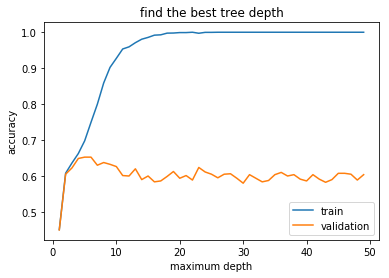

In [9]:
# plot the validation curves
plt.plot(scores_df['dt__max_depth'], scores_df['train accuracy'], label = 'train')
plt.plot(scores_df['dt__max_depth'], scores_df['validation accuracy'], label = 'validation')
plt.xlabel('maximum depth')
plt.ylabel('accuracy')
plt.legend()
plt.title('find the best tree depth')
plt.show()

**Q:** **Write your observations** in a markdown cell.

**A:** As it can be seen in the chart above, the train score increases with the maximum depth. On the other hand, the validation score increases at first and then reaches to its max at depth of around 5.

**Q:** Find and print the optimal depth and its accuracy on the validation set

In [10]:
# let's find the row id where the value in 'validation accuracy' column
row_id = scores_df['validation accuracy'].idxmax()

print('Top accuracy on validation set: ', scores_df['validation accuracy'].at[row_id], ' with depth: ', 
      scores_df['dt__max_depth'].at[row_id])

Top accuracy on validation set:  0.6525  with depth:  5


**Q:** **For the random forest classifier**, try different sizes of ensemble, e.g., 50, 100 and 200 trees. Fit the random forests on the train set and evaluate them on the evaluation one. Collect the results in a DataFrame.

In [11]:
pipe_forest = Pipeline([
    ('pca', pca), # The number of components in PCA are adopted from the "Data exploration" section
    ('rf', RandomForestClassifier(max_depth = None, random_state=0))
])

In [12]:
# let's define the values of parameters for grid search
estimator_list = np.arange(25, 501, 25)
test_scores = []

# let's define a grid of parameters for the tuning the depth of decision trees
grid = ParameterGrid({
    'rf__n_estimators': estimator_list
})

# put the parameters in place
for params_dict in grid:
    # Set parameters
    pipe_forest.set_params(**params_dict)

    # Fit a k-NN classifier
    pipe_forest.fit(X_trval, y_trval)

    # Save accuracy on test set
    params_dict['train accuracy'] = pipe_forest.score(X_trval, y_trval)
    params_dict['validation accuracy'] = pipe_forest.score(X_val, y_val)

    # Save result
    test_scores.append(params_dict)

# and let's make a data frame from test scores
forest_scores_df = pd.DataFrame(test_scores)
forest_scores_df
# the best results are achieved using using 400 estimators

rf__n_estimators  train accuracy  validation accuracy
0                 25             1.0              0.71000
1                 50             1.0              0.73125
2                 75             1.0              0.75875
3                100             1.0              0.75500
4                125             1.0              0.74500
5                150             1.0              0.76625
6                175             1.0              0.75375
7                200             1.0              0.75750
8                225             1.0              0.76625
9                250             1.0              0.77125
10               275             1.0              0.75875
11               300             1.0              0.76750
12               325             1.0              0.77250
13               350             1.0              0.76750
14               375             1.0              0.76125
15               400             1.0              0.78750
16               425             1.0              0.77250
17               450             1.0              0.77750
18               475             1.0              0.77125
19               500             1.0              0.77000

**Q:** Finally, fit your (tuned) decision tree and random forest estimators on the entire train set with 4,000 data points and evaluate them on the test set. Print the accuracy values.

In [13]:
pipe_tuned = Pipeline([
    ('pca', pca), # The number of components in PCA are adopted from the "Data exploration" section
    ('dt', DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state=0)) #insert the optimum depth
])
pipe_forest_tuned = Pipeline([
    ('pca', pca), # The number of components in PCA are adopted from the "Data exploration" section
    ('rf', RandomForestClassifier(n_estimators = 400, max_depth = None, random_state=0)) #insert the optimum number of estimators
])

# Fit the tuned pipelines in the entire train set
pipe_tuned.fit(X_tr, y_tr)
pipe_forest_tuned.fit(X_tr, y_tr)

# Save accuracy on test set
decision_tree_accuracy = pipe_tuned.score(X_te, y_te)
random_forest_accuracy = pipe_forest_tuned.score(X_te, y_te)

#let's print the accuracies of the test set
print('Decision tree accuracy (test set): ', decision_tree_accuracy)
print('Random forest accuracy (test set): ', random_forest_accuracy)

Decision tree accuracy (test set):  0.644
Random forest accuracy (test set):  0.779


In [14]:
# Put the decision tree accuracy in a DataFrame to be saved for FINAL COMPARISON step
dt_df = pd.DataFrame({'model' : ['decision tree'], 'test accuracy' : [decision_tree_accuracy]})
dt_df.to_csv('decision tree.csv')

# Put the random forest accuracy in a DataFrame to be saved for FINAL COMPARISON step
rf_df = pd.DataFrame({'model' : ['random forest'], 'test accuracy' : [random_forest_accuracy]})
rf_df.to_csv('random forest.csv')